In [265]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import collections
import itertools
import pickle
import glob

In [ ]:
!unzip titles_authors.zip

In [2]:
authors_names = glob.glob("titles_authors/authors*")

In [3]:
titles_path = glob.glob("titles_authors/titles*")

### Opening Data

In [4]:
authors = []
for author_name in authors_names:
    with open(author_name,"rb") as f:
        dat = pickle.load(f)    
    authors+=dat

In [5]:
titles = []
for author_name in titles_path:
    with open(author_name,"rb") as f:
        dat = pickle.load(f)    
    titles+=dat

In [13]:
print(len(titles))
print(len(authors))

1772603
1772603


In [16]:
auts = []
for author_list in authors:
    auts+=author_list

In [23]:
auts_set = set(auts)

In [25]:
auts_list = list(auts_set)

### Defining network

In [27]:
G = nx.Graph()

In [50]:
id_to_authors_dict = {idx:elem for idx, elem in enumerate(auts_list)}
authors_to_id_dict = {elem:idx for idx, elem in enumerate(auts_list)}

In [54]:
for idx, elem in enumerate(authors):
    if idx%10000 == 0:
        print(idx)
    if len(elem)>1:
        comb_list = list(itertools.combinations(elem, 2))
        for combination in comb_list:
            G.add_edge(authors_to_id_dict[combination[0]],authors_to_id_dict[combination[1]])

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
13

In [57]:
avg_degree_connect = nx.average_degree_connectivity(G)

In [64]:
degrees = G.degree()
avg_degree = np.mean(list(dict(degrees).values()))

##### Avg Degree

In [65]:
avg_degree

17.009459819188436

##### Number of Edges

In [68]:
G.number_of_edges()

9169281

In [72]:
components = nx.connected_components(G)

In [75]:
idx = 0
for comps in components:
    idx+=1

##### Giant Component

In [70]:
giant = max(nx.connected_components(G), key=len)

In [71]:
len(giant)

1000478

##### Largest Component over all

In [266]:
len(giant)/len(G)

0.9279675440736306

##### Degree Distribution

In [90]:
degrees = [val for (node, val) in G.degree()]

/home/alexandre/miniconda3/envs/venturus_keras/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  if sys.path[0] == '':


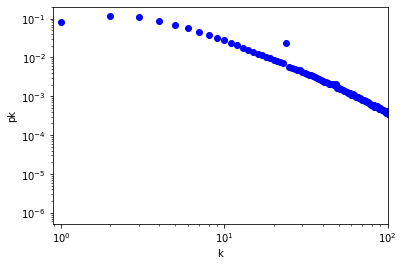

In [92]:
degree_sequence = sorted(degrees, reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

cnt = np.array(list(cnt))
cnt = cnt / cnt.sum()

fig, ax = plt.subplots(1)
plt.yscale("log")
plt.xscale("log")

ax.set_xlim(left=0, right=100)

plt.xlabel('k')
plt.ylabel('pk') 

ax.scatter(deg, cnt, color="b")
plt.show()

##### Fitting Power law

In [95]:
import powerlaw

In [102]:
fit = powerlaw.Fit(degrees) 

Calculating best minimal value for power law fit
/home/alexandre/miniconda3/envs/venturus_keras/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


/home/alexandre/miniconda3/envs/venturus_keras/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


<AxesSubplot:xlabel='k', ylabel='pk'>

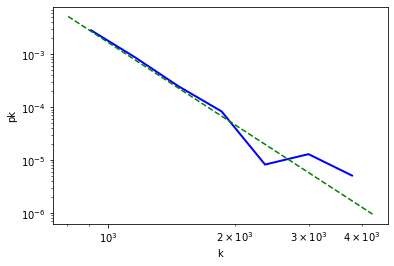

In [103]:
fig2 = fit.plot_pdf(color='b', linewidth=2)
plt.xlabel('k')
plt.ylabel('pk') 
fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2)

In [105]:
fit.power_law.alpha, fit.power_law.sigma, fit.xmin

(5.165875737512071, 0.2821487071343351, 803.0)

##### Average Clustering

In [106]:
nx.average_clustering(G)

0.6583953132344568

### Most common names

In [114]:
degrees_dict = {node: val for (node, val) in G.degree()}

In [121]:
names = []
for name, degree_cnt in degrees_dict.items():
    if degree_cnt in list(deg[:10]):
        names.append(name)
#         break

In [129]:
deg[:10]

(4247, 2833, 2742, 2179, 1854, 1805, 1783, 1686, 1684, 1665)

In [122]:
names

[14455, 486249, 1046688, 305854, 647101, 67833, 989684, 191828, 801517, 178191]

In [126]:
for name in names:
    print(id_to_authors_dict[name])

 :
Donald P. Schneider
Y. Chen
R. J. Ivison
Y. Zhang
 .
Y. Wang
Takashi Taniguchi
Yang Liu
Kenji Watanabe


### Shortest Path By Name

In [277]:
def shortest_path(G, name_1, name_2):
    try:
        au1 = authors_to_id_dict[name_1]
    except:
        raise KeyError(f"No person {name_1} found in authors")

    try:
        au2 = authors_to_id_dict[name_2]
    except:
        raise KeyError(f"No person {name_2} found in authors")
        
    path = nx.shortest_path(G, au1, au2)    
    
    return [id_to_authors_dict[idx] for idx in path]

In [296]:
shortest_path(G, "Alexandre Lopes","Miguel A. L. Nicolelis")

['Alexandre Lopes',
 'Rodrigo Nogueira',
 'Kyunghyun Cho',
 'Helmut Laufs',
 'Dante R. Chialvo',
 'Miguel A. L. Nicolelis']

In [331]:
shortest_path(G, "Rodrigo Nogueira", "Albert-László Barabási")

['Rodrigo Nogueira', 'Kexin Huang', 'Marinka Zitnik', 'Albert-László Barabási']

### Are you in largest component?

In [305]:
def you_in_largest(giant, name):
    try:
        au1 = authors_to_id_dict[name]
    except:
        raise KeyError(f"No person {name} found in authors")
    return au1 in giant

In [326]:
you_in_largest(giant, "João Meidanis")

False

In [327]:
you_in_largest(giant, "Alexandre Lopes")

True

### Shortest Name (Wrong Search) - SLOW

In [332]:
import difflib

In [350]:
def find_closest(auts_list, input_name, elements=1):
    return difflib.get_close_matches(input_name, auts_list)[:elements]

In [352]:
find_closest(auts_list, "Miguel Nicolelis", 3)

['Miguel A. L. Nicolelis', 'Miguel Nicolau', 'Miguel Robles']

In [354]:
shortest_path(G, "Alexandre Lopes", "Miguel A. L. Nicolelis")

['Alexandre Lopes',
 'Rodrigo Nogueira',
 'Kyunghyun Cho',
 'Helmut Laufs',
 'Dante R. Chialvo',
 'Miguel A. L. Nicolelis']